<a href="https://colab.research.google.com/github/MDGF93/IaCD/blob/main/Trabalho_Final_ICD_Grupo_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Relatório de Projeto Final - Grupo 2
**Introdução à Ciência de Dados - Prof. Gustavo Oliveira - Semestre 2021/1**


***Equipe:***
- Ismael Alves Lima, ‘Ismael.alves@academico.ufpb.br’
- Jansen Cruz de Souza, ‘jansen.souza@gmail.com’
- Marcos Dantas Guimarães Filho, ‘mdgf@academico.ufpb.br’
- Ramon Azevedo dos Santos Cavalcanti, ‘ramontolete12@gmail.com’
- Renan Cavalcanti Florentino ‘renanflorentino2011@gmail.com’




## Resumo

Este relatório tem a finalidade de analisar os dados referente a movimentação do gás natural nas regiões do Brasil. A ideia seria mapear o nível de produtividade desse insumo principalmente na região Nordeste, já que o investimento em gasodutos veio à tona, devido também à atual crise elétrica. Aplicamos a técnica de heatmap para destacar o potencial para produção de gás natural nas regiões do Brasil




## Descrição do problema

No Brasil, com a consequente crise de energia elétrica , tomou impulso um grande esforço do governo brasileiro para incrementar a expansão da potência instalada através de usinas termelétricas alimentadas por gás natural (PRAÇA, 2003).


Em geral, as perspectivas para a utilização plena e racional do gás natural no mundo são bastante promissoras, pois é possível obter alta eficiência energética utilizando sistemas de cogeração, produzindo conjuntamente calor (ou frio) e energia. Além disso, diversas outras aplicações no setor veicular, industrial e residencial podem ser incrementadas, configurando-se nos chamados “usos nobres” do gás natural (SANTOS, 2002).


A questão central que buscamos responder é: *podemos construir um mapa de calor sobre as regiões do Brasil pelo qual possamos, rapidamente, visualizar o potencial de geração de gás natural no Nordeste?* *Podemos enxergar quais seriam os indices de produtividade, disponibilidade e consumo na região do Nordeste ao longo dos anos?*

## Metodologia de solução

Para resolver o problema proposto, usamos a seguinte metodologia:


1.  Coleta de dados no site da Agência Nacional do Petróleo, Gás Natural e Biocombustíveis (ANP), órgão regulador das atividades que integram as indústrias de petróleo, gás natural e de biocombustíveis no Brasil. Abaixo estão os códigos que foram utilizados para realizar a coleta dos arquivos de *dataframe* diretamente do site da ANP.


In [ ]:
import pandas as pd
df  = pd.read_csv("https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/ppgn-el/consumo-proprio-gn1000m3-2000-2021.csv", sep=";")
df2 = pd.read_csv("https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/ppgn-el/producao-gas-natural-1000m3-1997-2021.csv", sep=";")
df3 = pd.read_csv("https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/ppgn-el/gn-disponivel-1000m3-2000-2021.csv", sep=";")

2.  Limpeza e processamento dos dados utilizando os módulos pandas e numpy para construir DataFrames contendo os parâmetros mais relevantes de análise. A seguir, mostramos como foi realizada a limpeza dos dados colhidos:


Trocando as vírgulas por ponto nos valores númericos, pois o Pandas não funcionaria corretamente caso seja utilizado vírgulas como separador decimal.

In [ ]:
for idx in range(len(df)):
    df.at[idx,"CONSUMO"] = df.at[idx,"CONSUMO"].replace(",",".")
for idx in range(len(df2)):
    df2.at[idx,"PRODUÇÃO"] = df2.at[idx,"PRODUÇÃO"].replace(",",".")
for idx in range(len(df3)):
    df3.at[idx,"DISPONÍVEL"] = df3.at[idx,"DISPONÍVEL"].replace(",",".")


Renomeando as colunas para que seja possível utilizar o método `.query()` do Pandas para realizar a filtragem dos dados, pois alguns caracteres presentes na língua portuguesa não são suportados pelo método `.query()`.

In [ ]:
df = df.rename(columns={"ANO":"ano", "MÊS":"mes", "GRANDE REGIÃO":"granderegiao", "UNIDADE DA FEDERAÇÃO":"unidadedafederacao",
          "PRODUTO":"produto","LOCALIZAÇÃO":"localizacao", "CONSUMO":"consumo"})
df2 = df2.rename(columns={"ANO":"ano", "MÊS":"mes", "GRANDE REGIÃO":"granderegiao", "UNIDADE DA FEDERAÇÃO":"unidadedafederacao",
          "PRODUTO":"produto","LOCALIZAÇÃO":"localizacao", "PRODUÇÃO":"producao"})
df3 = df3.rename(columns={"ANO":"ano", "MÊS":"mes", "GRANDE REGIÃO":"granderegiao", "UNIDADE DA FEDERAÇÃO":"unidadedafederacao",
          "PRODUTO":"produto","LOCALIZAÇÃO":"localizacao", "DISPONÍVEL":"disponivel"})

Convertendo o `datatype` das colunas em númerico.

In [ ]:
df["consumo"]     = pd.to_numeric(df["consumo"])
df2["producao"]   = pd.to_numeric(df2["producao"])
df3["disponivel"] = pd.to_numeric(df3["disponivel"])

### Dataframes de métricas notáveis

A seguir, mostramos um recorte de um dos *DataFrames* apresentando a média de ***consumo*** de Gás Natural, no período de 2019 até 2021, de cada região do Brasil.

In [ ]:
df.query("ano >= 2019").groupby(["granderegiao", "ano"]).mean()

consumo
granderegiao    ano               
REGIÃO NORDESTE 2019   2325.404867
                2020   1314.320738
                2021   1116.265929
REGIÃO NORTE    2019   7352.223400
                2020   6711.636611
                2021   6479.674305
REGIÃO SUDESTE  2019  64717.955245
                2020  69479.466330
                2021  68165.087374
REGIÃO SUL      2019      0.000000
                2020      0.000000
                2021      0.000000


A seguir, mostramos um recorte de um dos *DataFrames* apresentando a média de ***produção*** de Gás Natural, no período de 2019 até 2021, de cada região do Brasil.

In [ ]:
df2.query("ano >= 2019").groupby(["granderegiao", "ano"]).mean()

producao
granderegiao    ano                
REGIÃO NORDESTE 2019   33340.980170
                2020   25330.561360
                2021   32204.700074
REGIÃO NORTE    2019  232128.311429
                2020  206549.031754
                2021  205161.616080
REGIÃO SUDESTE  2019  477111.823979
                2020  528399.033300
                2021  544326.443234
REGIÃO SUL      2019       0.000000
                2020       0.000000
                2021       0.000000


A seguir, mostramos um recorte de um dos *DataFrames* apresentando a média de ***disponibilidade*** de Gás Natural, no período de 2019 até 2021, de cada região do Brasil.

In [ ]:
df3.query("ano >= 2019").groupby(["granderegiao", "ano"]).mean()

disponivel
granderegiao    ano                
REGIÃO NORDESTE 2019   26124.524608
                2020   21731.023930
                2021   29349.208711
REGIÃO NORTE    2019  101046.188583
                2020  105844.389313
                2021  109344.774410
REGIÃO SUDESTE  2019  222219.156236
                2020  199733.034190
                2021  182393.537868
REGIÃO SUL      2019       0.000000
                2020       0.000000
                2021       0.000000

In [ ]:
df['localizacao']

0         MAR
1         MAR
2         MAR
3         MAR
4         MAR
        ...  
5740    TERRA
5741    TERRA
5742    TERRA
5743    TERRA
5744    TERRA
Name: localizacao, Length: 5745, dtype: object

In [ ]:
df2

,ano,mes,granderegiao,unidadedafederacao,produto,localizacao,producao
0,1997,JAN,REGIÃO SUDESTE,RIO DE JANEIRO,GÁS NATURAL,MAR,325655.00000
1,1997,FEV,REGIÃO SUDESTE,RIO DE JANEIRO,GÁS NATURAL,MAR,330876.00000
2,1997,MAR,REGIÃO SUDESTE,RIO DE JANEIRO,GÁS NATURAL,MAR,346070.00000
3,1997,ABR,REGIÃO SUDESTE,RIO DE JANEIRO,GÁS NATURAL,MAR,323297.00000
4,1997,MAI,REGIÃO SUDESTE,RIO DE JANEIRO,GÁS NATURAL,MAR,309287.00000
...,...,...,...,...,...,...,...
6472,2021,JUN,REGIÃO SUDESTE,ESPÍRITO SANTO,GÁS NATURAL,TERRA,2011.64982
6473,2021,JUL,REGIÃO SUDESTE,ESPÍRITO SANTO,GÁS NATURAL,TERRA,2252.51107
6474,2021,AGO,REGIÃO SUDESTE,ESPÍRITO SANTO,GÁS NATURAL,TERRA,1894.26625
6475,2021,SET,REGIÃO SUDESTE,ESPÍRITO SANTO,GÁS NATURAL,TERRA,1795.55080


In [ ]:
df2.style.set_caption("Produção")
df2

,ano,mes,granderegiao,unidadedafederacao,produto,localizacao,producao
0,1997,JAN,REGIÃO SUDESTE,RIO DE JANEIRO,GÁS NATURAL,MAR,325655.00000
1,1997,FEV,REGIÃO SUDESTE,RIO DE JANEIRO,GÁS NATURAL,MAR,330876.00000
2,1997,MAR,REGIÃO SUDESTE,RIO DE JANEIRO,GÁS NATURAL,MAR,346070.00000
3,1997,ABR,REGIÃO SUDESTE,RIO DE JANEIRO,GÁS NATURAL,MAR,323297.00000
4,1997,MAI,REGIÃO SUDESTE,RIO DE JANEIRO,GÁS NATURAL,MAR,309287.00000
...,...,...,...,...,...,...,...
6472,2021,JUN,REGIÃO SUDESTE,ESPÍRITO SANTO,GÁS NATURAL,TERRA,2011.64982
6473,2021,JUL,REGIÃO SUDESTE,ESPÍRITO SANTO,GÁS NATURAL,TERRA,2252.51107
6474,2021,AGO,REGIÃO SUDESTE,ESPÍRITO SANTO,GÁS NATURAL,TERRA,1894.26625
6475,2021,SET,REGIÃO SUDESTE,ESPÍRITO SANTO,GÁS NATURAL,TERRA,1795.55080


A seguir, unimos todos os *DataFrames* coletados, e realizamos a análise de correlação entre as colunas de consumo, produção e disponibilidade.


In [ ]:
df_cpy=df
df_cpy = pd.merge(df_cpy, df2, how='left', left_on=['produto','ano', 'mes', 'granderegiao', 'unidadedafederacao', 'localizacao'], right_on = ['produto','ano', 'mes', 'granderegiao', 'unidadedafederacao', 'localizacao'])
df_cpy = pd.merge(df_cpy, df3, how='left', left_on=['produto','ano', 'mes', 'granderegiao', 'unidadedafederacao', 'localizacao'], right_on = ['produto','ano', 'mes', 'granderegiao', 'unidadedafederacao', 'localizacao'])


In [ ]:
corr = df_cpy[['consumo','producao','disponivel']].corr()
df_cpy[['consumo','producao','disponivel']].corr()

,consumo,producao,disponivel
consumo,1.000000,0.915796,0.877914
producao,0.915796,1.000000,0.930340
disponivel,0.877914,0.930340,1.000000


In [ ]:
corr_consumo_disp = corr['consumo'].iloc[2]
corr_consumo_prod = corr['consumo'].iloc[1]
corr_prod_disp = corr['producao'].iloc[2]


### Carregamento dados de geolocalização

Carregamento dos dados geográficos para o `geopandas`:

COLOCAR OS CODIGOS DO CARREGAMENTO DOS MAPAS

```python
# local directory on your computer
local_dir = '/Users/gustavo/Downloads/'

# level 1 shape file
bra = geo.read_file(local_dir + 'gadm36_BRA_shp/gadm36_BRA_1.shp')

# level 2 shape file
bra2 = geo.read_file(local_dir + 'gadm36_BRA_shp/gadm36_BRA_2.shp')

# NE region mask
mask = (bra['NAME_1'] == 'Alagoas') | \
       (bra['NAME_1'] == 'Bahia') | \
       (bra['NAME_1'] == 'Ceará') | \
       (bra['NAME_1'] == 'Maranhão') | \
       (bra['NAME_1'] == 'Pernambuco') | \
       (bra['NAME_1'] == 'Piauí') | \
       (bra['NAME_1'] == 'Paraíba') | \
       (bra['NAME_1'] == 'Rio Grande do Norte') | \
       (bra['NAME_1'] == 'Sergipe')

# NE state limits
NE = bra[mask]

# simulate values for 4 states: AL, PB, PE, and RN
AL = simulate_POTBIOG('Alagoas',0.211,0.05)
PB = simulate_POTBIOG('Paraíba',0.652,0.06)
PE = simulate_POTBIOG('Pernambuco',0.443,0.1)
RN = simulate_POTBIOG('Rio Grande do Norte',0.112,0.08)

# to have POTBIOG's merged distribution
# check for artifacts!!!
ALL = AL.merge(PB,how='outer')
ALL = ALL.merge(PE,how='outer')
ALL = ALL.merge(RN,how='outer')

# plot figure for all NE region
fig, ax = subplots(figsize=(12,8))
NE.plot(ax=ax,edgecolor='k',facecolor='gray',alpha=0.3)
ALL.plot(ax=ax,column='POTBIOG',cmap='Reds',legend=True)
ax.set_xticks([])
ax.set_yticks([]);
title('Potencial de Biogás - Região NE')

# plot figures per state of interest    
for a,b in [(AL,'Potencial de Biogás - AL'),
            (PB,'Potencial de Biogás - PB'),
            (PE,'Potencial de Biogás - PE'),
            (RN,'Potencial de Biogás - RN')]:
    plotfig(a,b)
```
<hr>

## Resultados, análise e discussão

Verifica-se que os valores se distribuem de maneira heterogênea na região estudada, mas o POTBIOG do estado da Paraíba é superior aos demais.

In [ ]:
import plotly.express as px
consumo_dash = df.groupby(["granderegiao", "ano"]).sum()
producao_dash = df2.groupby(["granderegiao", "ano"]).sum()
disponivel_dash = df3.groupby(["granderegiao", "ano"]).sum()

In [ ]:
consumo_dash.reset_index(inplace=True)
producao_dash.reset_index(inplace=True)
disponivel_dash.reset_index(inplace=True)

Consumo total de cada região brasileira entre o período de 2000 a 2021. Percebe-se houve uma variação pequena no consumo ao longo dos anos nas regiões Norte, Nordeste e Sul. É notável que a região Sudeste estava em constante crescimento até o ano de 2020, porém em 2021 podemos perceber uma queda de visivel que pode ser interpretada por conta do período de pandemia. É preciso notar, também, que para a região Sul a partir do ano de 2009, não há mais registro de consumo na região.

In [ ]:
px.line(consumo_dash, x='ano',y='consumo', color='granderegiao')

In [ ]:
px.line(producao_dash, x="ano",y='producao', color='granderegiao')

In [ ]:
px.line(disponivel_dash, x="ano", y='disponivel', color='granderegiao')

In [ ]:
disponivel_dash.keys()

Index(['granderegiao', 'ano', 'disponivel'], dtype='object')

In [ ]:
px.scatter(x=disponivel_dash['disponivel'], y=producao_dash.query("ano > 1999")['producao'],
           labels={"x":"Disponibilidade", "y":"Produção"})


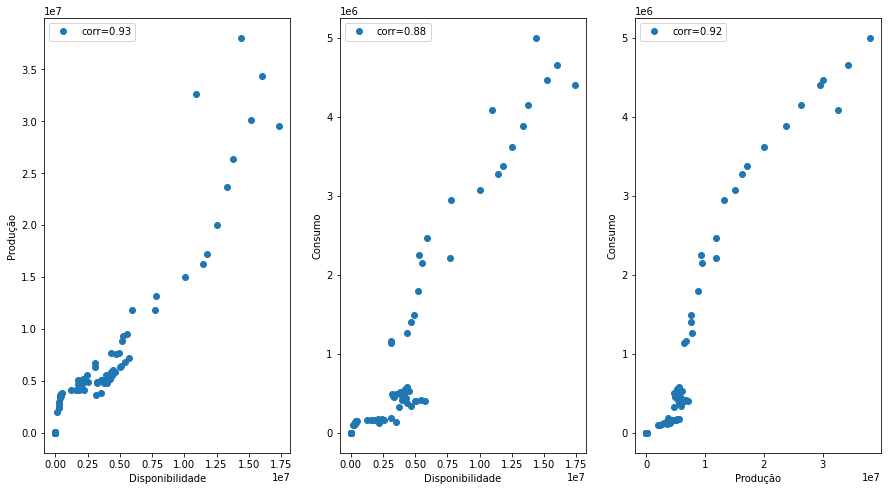

In [ ]:
#corr_consumo_disp = corr['consumo'].iloc[2]
#corr_consumo_prod = corr['consumo'].iloc[1]
#corr_prod_disp = corr['producao'].iloc[2]
import matplotlib.pyplot as plt

fig,ax = plt.subplots(1,3,figsize=(15,8))
# plot 1
ax[0].plot(disponivel_dash['disponivel'],producao_dash.query("ano > 1999")['producao'],'o',label=f'corr={round(corr_prod_disp,2)}')
ax[0].set_xlabel('Disponibilidade'); 
ax[0].set_ylabel('Produção'); 
ax[0].legend()
# plot 2
ax[1].plot(disponivel_dash['disponivel'],consumo_dash.query("ano > 1999")['consumo'],'o',label=f'corr={round(corr_consumo_disp,2)}')
ax[1].set_xlabel('Disponibilidade'); 
ax[1].set_ylabel('Consumo'); 
ax[1].legend()

# plot 3
ax[2].plot(producao_dash.query("ano > 1999")['producao'],consumo_dash.query("ano > 1999")['consumo'],'o',label=f'corr={round(corr_consumo_prod,2)}')
ax[2].set_xlabel('Produção'); 
ax[2].set_ylabel('Consumo'); 
ax[2].legend()

plt.show()

## Referências bibliográficas

Registre todas as referências utilizadas no formato utilizado no template do mini-artigo. Referências incluem:

- Livro
- Artigo
- Site
- Post
- etc.

### Ajuda (esta seção não deve ser incluída no relatório!)

Recursos para aprender como escrever o relatório. Caso queira fazer algo e não saiba, pergunte ao professor. Se ele souber, orientará como fazer.

- O que é Markdown?: [link](https://pt.wikipedia.org/wiki/Markdown)

- Dicas rápidas de Markdown: [link](https://www.markdownguide.org/cheat-sheet/)

- Editor online para aprender Markdown: [link](https://stackedit.io/app#)

- Como inserir texto, imagens e tabelas em notebooks: [link](https://www.earthdatascience.org/courses/intro-to-earth-data-science/file-formats/use-text-files/format-text-with-markdown-jupyter-notebook/)